In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


In [29]:
data = pd.read_csv(r'C:\Users\mobin\Desktop\issue\SS.csv')
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [30]:
data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [32]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


Dropping "HDI for year" because 19456 values are Null values& Dropping "country-year" to avoid redundancy of data

In [33]:
data.drop(['HDI for year','country-year'],inplace = True,axis=1)

In [34]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


## Population of different countries

<function matplotlib.pyplot.show(close=None, block=None)>

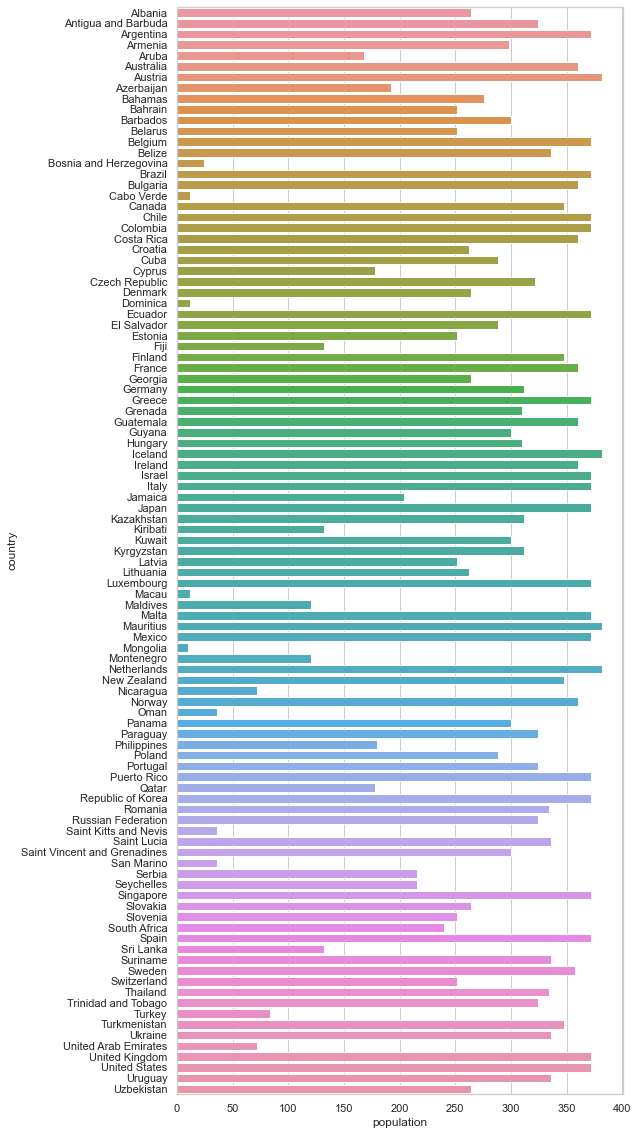

In [35]:
sns.set(style = "whitegrid")
fig ,ax = plt.subplots(figsize=(8,20))
y = sns.barplot(data.population.groupby(data.country).count(),data.population.groupby(data.country).count().index)
plt.show

## Frequency of different generations

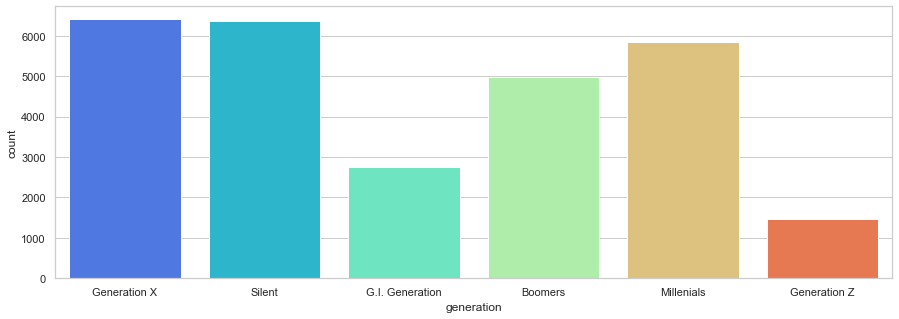

In [52]:
fig, ax = plt.subplots(1,1, figsize = (15,5))
ax = sns.countplot(data.generation,palette='rainbow')
plt.show()

Number of suicides in different age groups :
It shows that Age category with maximum suicide number is 35-54 years

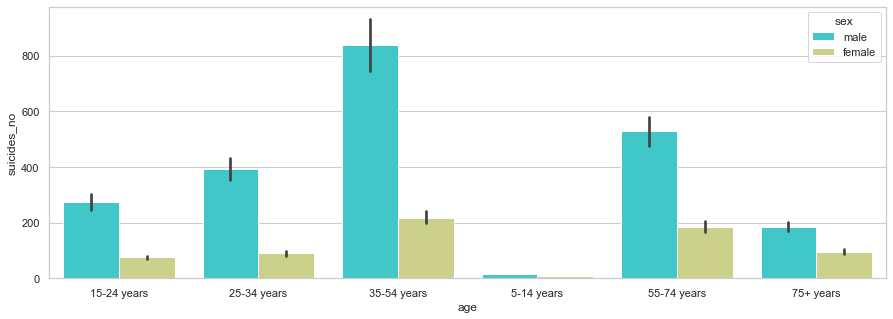

In [78]:
fig, aax =plt.subplots(1,1,figsize=(15,5))
ax = sns.barplot(x = data.age.sort_values(), y = 'suicides_no',
                 hue='sex',data=data, palette='rainbow')
plt.show()

Suicides each year since 2000:
There are least cases of suicides in year 2016 since the year 2000¶

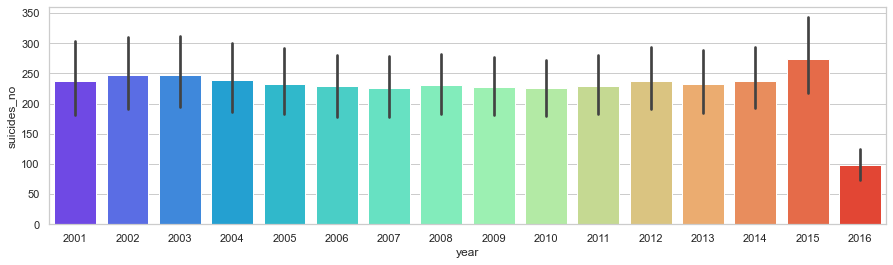

In [79]:
f,ax = plt.subplots(1,1,figsize=(15,4))
ax = sns.barplot(x = data[data.year > 2000]['year'],y = 'suicides_no',data=data,palette='rainbow')
plt.show()

## Distribution of suicides/100k pop

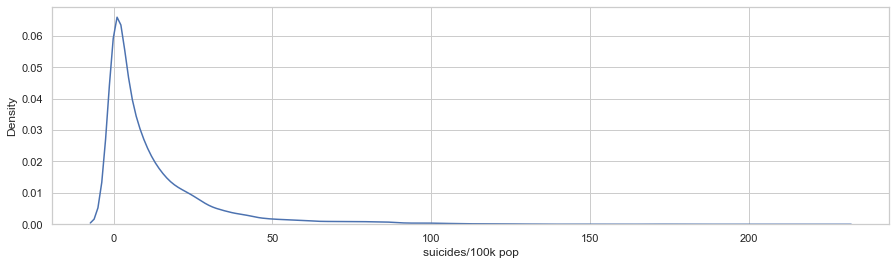

In [62]:
f,ax = plt.subplots(1,1,figsize=(15,4))
ax = sns.kdeplot(data['suicides/100k pop'])
plt.show()

## Top 10 Countries with maximum number of suicides/100k pop

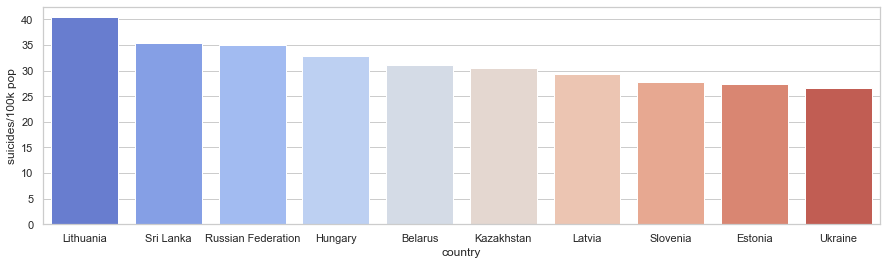

In [63]:
data_suicide_mean = data['suicides/100k pop'].groupby(data.country).mean().sort_values(ascending = False)
fig , ax = plt.subplots(1,1,figsize=(15,4))
ax = sns.barplot(data_suicide_mean.head(10).index , data_suicide_mean.head(10), palette = 'coolwarm')
plt.show()

## Change in number of suicides each year

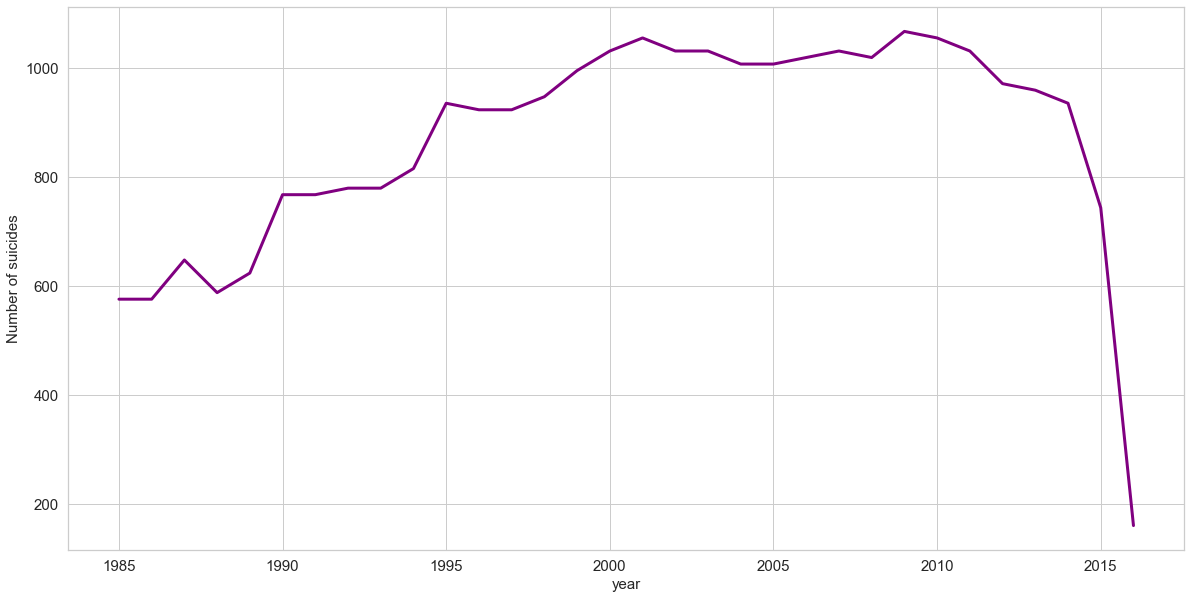

In [70]:
data_time = data['suicides_no'].groupby(data.year).count()
data_time.plot(figsize=(20,10), linewidth=3, fontsize=15, color='purple')
plt.xlabel('year', fontsize = 15)
plt.ylabel('Number of suicides',fontsize = 15)
plt.show()

## Change in gdp_per_capita per year

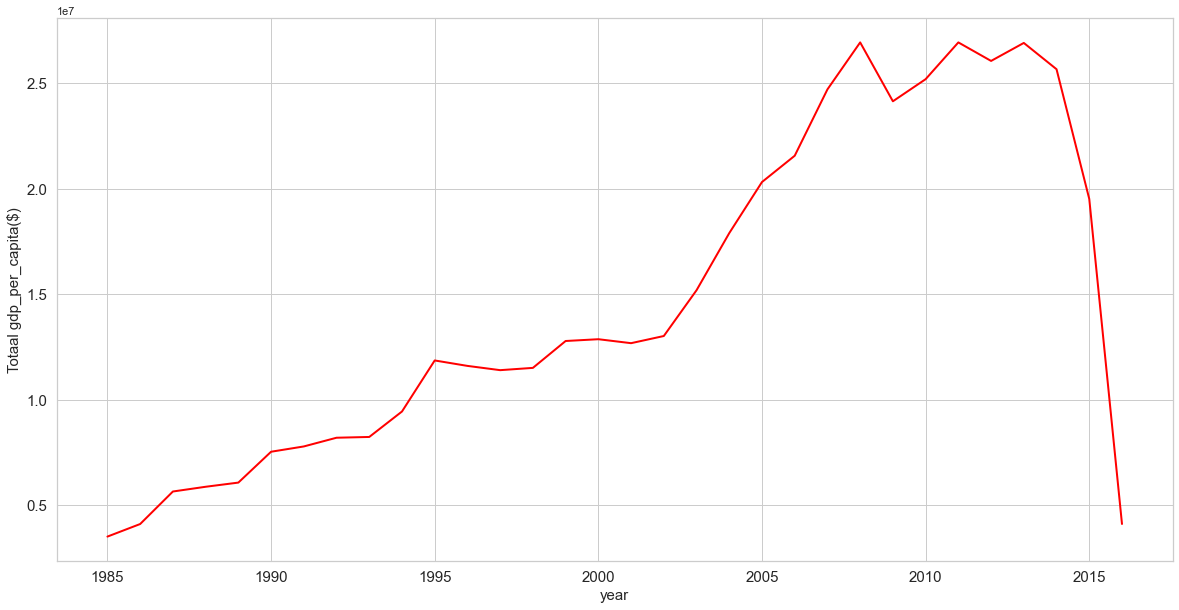

In [71]:
data_GDP = (data['gdp_per_capita ($)'].groupby(data.year)).sum()
data_GDP.plot(figsize=(20,10), linewidth=2, fontsize=15,color='red')
plt.xlabel('year', fontsize=15)
plt.ylabel('Totaal gdp_per_capita($)', fontsize=15)
plt.show()

## Top 10 countries with maximum number of suicides since 1985

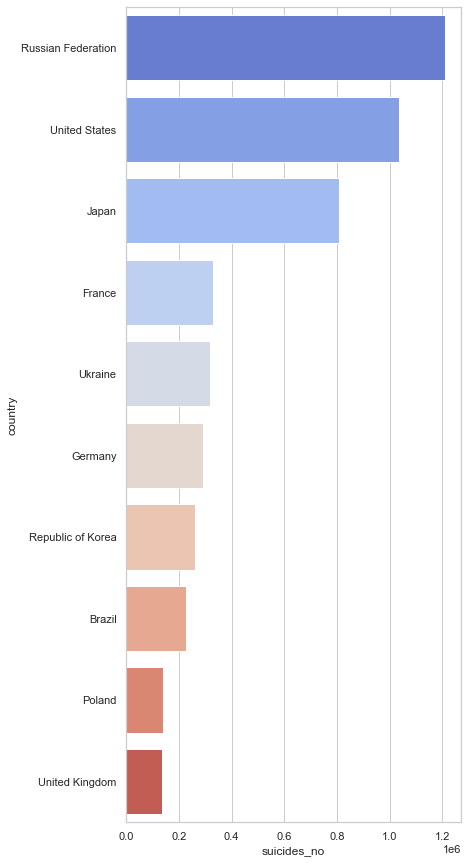

In [72]:
data_suicide = data['suicides_no'].groupby(data.country).sum().sort_values(ascending=False)
f,ax = plt.subplots(1,1,figsize=(6,15))
ax = sns.barplot(data_suicide.head(10),data_suicide.head(10).index,palette='coolwarm')

## Top 10 countries with least number of suicides since 1985

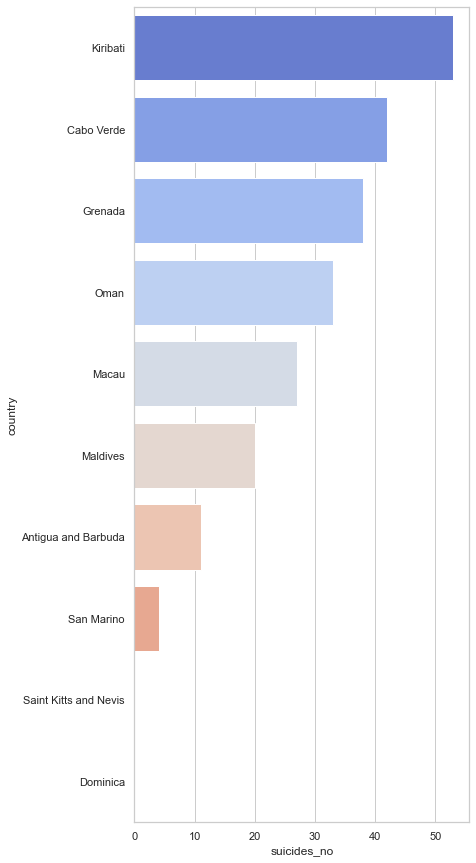

In [73]:
data_suicide = data['suicides_no'].groupby(data.country).sum().sort_values(ascending=False)
f,ax = plt.subplots(1,1,figsize=(6,15))
ax = sns.barplot(data_suicide.tail(10),data_suicide.tail(10).index,palette='coolwarm')

## gdp_per_capita Vs suicides/100k pop

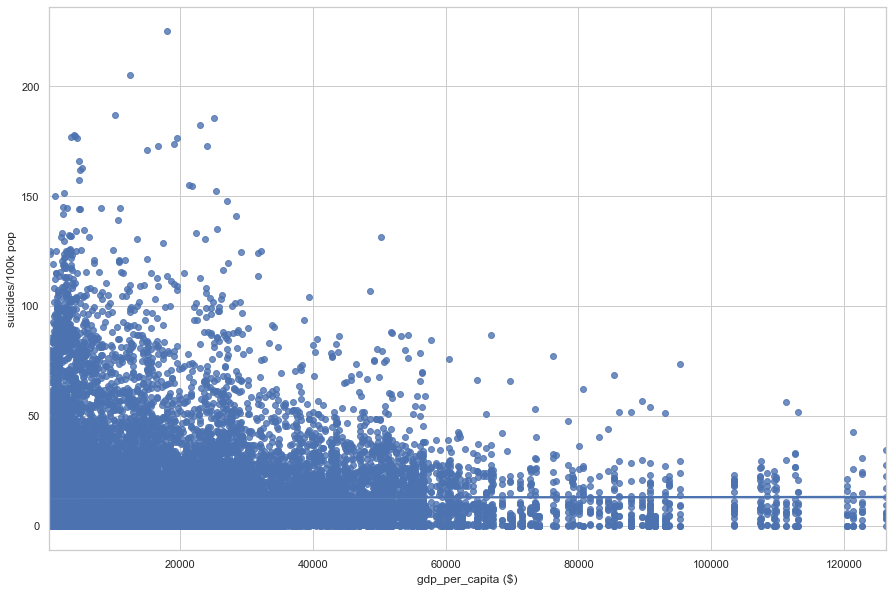

In [74]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.regplot(x='gdp_per_capita ($)', y='suicides/100k pop',data=data)
plt.show()

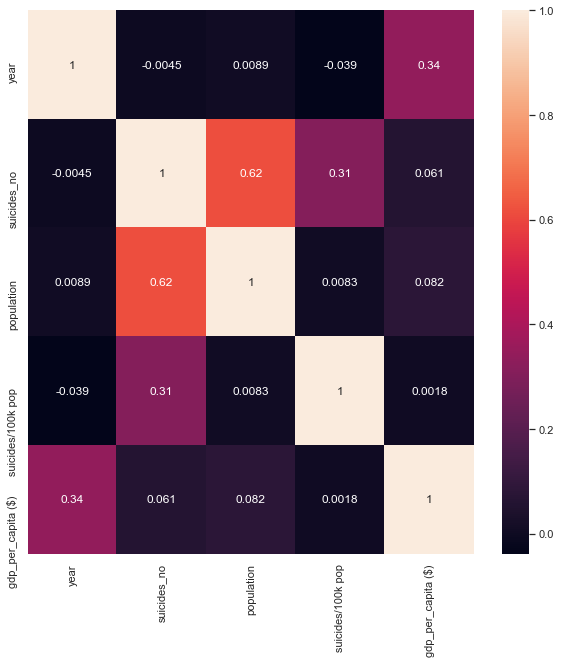

In [75]:
f,ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.heatmap(data.corr(),annot=True)
plt.show()
